# 1. Bit.ly의 1.USA.gov 데이터
- .gov나 .mil로 끝나는 URL을 축약한 사용자들에게 대한 익명 정보

In [1]:
import json

## 1. 데이터 불러오기

In [2]:
# json 모듈의 loads 함수를 이용해 샘플 파일을 한줄 씩 읽음
path = './pydata-book-2nd-edition/datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path, encoding='utf-8')]
records[:2]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]}]

## 2.표준 시간대 세어보기
- 데이터에서 가장 빈도가 높은 표준시간대(tz 필드) 구하기

### 2.1 순수 파이썬으로 표준시간대 세어보기
- records의 아이템이 모두 tz 필드를 가지고 있지 않다.

In [3]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:5]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York']

##### Count 함수 구현

In [4]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [5]:
# 파이썬 표준 라이브러리 사용
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # 값이 0으로 초기화
    for x in sequence:
        counts[x] += 1
    return counts

In [6]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [7]:
len(time_zones)

3440

#### 순수 파이썬으로 상위 10개 표준시간대

In [8]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [9]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

#### 파이썬 표준 라이브러리로 상위 10개 표준시간대

In [10]:
# collections.Counter 클래스를 활용한 방법
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 2.2 Pandas로 표준시간대 세어보기

In [11]:
import pandas as pd


frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [12]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

#### 비어 있는 표준시간대를 다른 이름으로 변경

In [13]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

#### matplolib 으로 그래프 그리기
- matplotlib으로 usa.gov 예제 데이터에서 가장 많이 나타난 시간대를 그래프로 확인 할 수 있다.

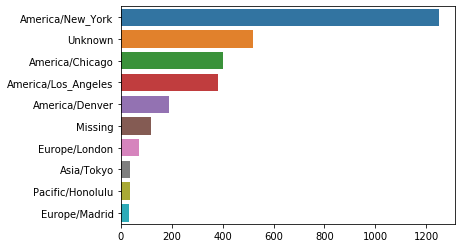

In [14]:
import seaborn as sns


subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

## 3. a 필드
- a 필드를 통해 User Agent 문자열이 있다.
    - User Agent: 브라우저, 단말기, 애플리케이션에 대한 정보

In [15]:
frame['a'][1], frame['a'][50], frame['a'][51][:50]

('GoogleMaps/RochesterNY',
 'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2',
 'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9')

### 3.1 브라우저 정보 잘라내기
- User Agent를 통해 브라우저의 종류를 알아내 사용자 행동에 대한 다른 개요를 만들 수 있다.

In [16]:
# frame에서 a필드가 NaN인 데이터를 제거 후 Series 객체로 생성
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [17]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

## 4. 윈도우 사용자와 비윈도우 사용자 그룹 나누기
- 표준시간대 순위표를 윈도우 사용자와 비윈도우 사용자 그룹으로 나눈다.
- agent 문자열이 Windows를 포함하면 윈도우 사용자로 가정

In [18]:
import numpy as np


cframe = frame[frame.a.notnull()]

# np.where은 조건에 맞는 값을 반환
# a 필드에 Window 문자열을 포함하면 Winodws를 반환, 아니면 Not Windows를 반환
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows', 'Not Windows')
cframe['os'][:5]

C:\Users\BIT\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

### 4.1 표준시간대와 운영체제를 기준으로 데이터 그룹화

In [19]:
by_tz_os = cframe.groupby(['tz', 'os'])

# 그룹화 되어 있는 데이터프레임을 size 함수로 그룹별 합계를 구함
# unstack 함수를 이용해서 표로 재배치
# fillna로 nan값을 0으로 채움
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


### 4.2 전체 표준 시간대의 순위

#### 4.2.1 argsort와 take 함수 사용 (방법 1)

In [20]:
# sum은 행과 열의 합계를 구할 때 사용
# sum(axis=1) : 행 합계를 구할 때
# sum(axis=0) : 열 합계를 구할 때
# argsort() : 오름차순 정렬 후 순서를 반환
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

- 가장 큰 값 10개의 데이터만 잘라낸다.

In [21]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


#### 4.2.2 Pandas의 nlargest 사용 (방법 2)

In [22]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

## 5. 데이터 시각화

- plot 함수에 stacked=True를 하면 데이터를 중첩막대그래프로 만들 수 있음

In [23]:
count_subset = count_subset.stack()
count_subset.name = 'total'

# index를 재설정 해줌
count_subset = count_subset.reset_index()
count_subset

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


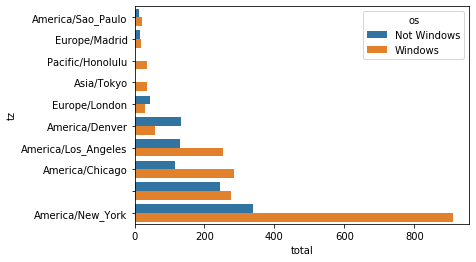

In [24]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

### 5.1 정규화
- 위 그래프로는 작은 그룹에서 윈도우 사용자의 상대 비율을 확인하기 어려움
- 하지만 각 로우에서 총합을 1로 정규화 한 뒤 그래프를 그리면 쉽게 확인 가능

In [25]:
def norm_total(group):
    group['normed_total'] = group.total /group.total.sum()
    return group

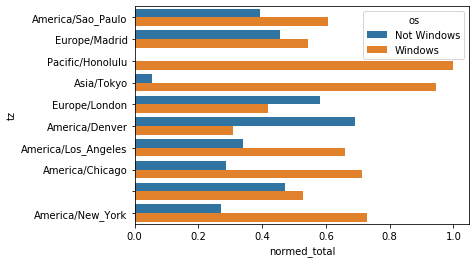

In [26]:
results = count_subset.groupby('tz').apply(norm_total)

sns.barplot(x='normed_total', y='tz', hue='os', data=results)

##### grouby와 transform 메서드를 이용해서 정규합 계산을 더 효율적으로 할 수 있음

In [27]:
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

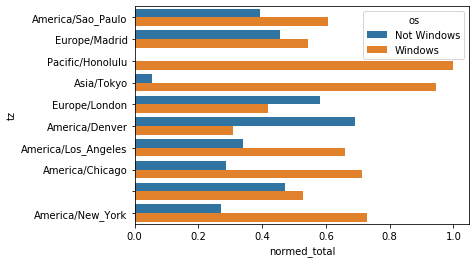

In [28]:
def norm_total(group):
    group['normed_total'] = group.total / g.total.transform('sum')
    return group

results2 = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x='normed_total', y='tz', hue='os', data=results2)